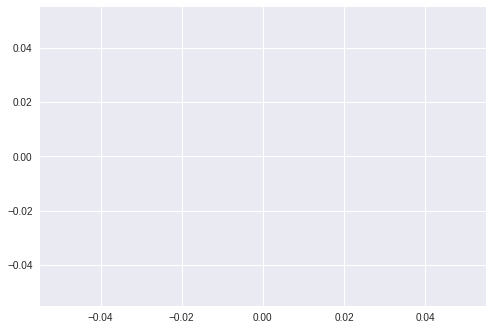

In [41]:
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

precision = 2
range_graph = 25
fig, ax = plt.subplots()
xdata, ydata = np.arange(-range_graph, range_graph, 10**(-precision)), np.arange(-range_graph , range_graph , 10**(-precision))
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(-range_graph, range_graph)
    ax.set_ylim(-range_graph, range_graph)
    return ln,

def rotate(point, angle):
    px, py = point
    qx = math.cos(angle) * px - math.sin(angle) * py
    qy = math.sin(angle) * px + math.cos(angle) * py
    return qx, qy

def animate(frame):
  
    rotation = math.pi * int(frame) / 180
    
    x_vals_rot = []
    y_vals_rot = []
    
    for x in xdata:

      x_rot, y_rot = rotate((x,float(eval(eq))), rotation)

      x_vals_rot.append(x_rot)
      y_vals_rot.append(y_rot)  

    ln.set_data(x_vals_rot, y_vals_rot)
    
    return ln,

In [43]:
eq = input("Math equation (format expression with variable x) - Ex. x**2: ")
animated = input("Do you want to animate the rotation? (y or n): ")
rotation = int(input("How much do you want to rotate the above equation by? (degrees): "))

if animated == 'n':
  
  x_vals_rot, y_vals_rot = plot_with_rot(rotation, np.arange(-range_graph , range_graph , 10**(-precision)))
  plt.plot(x_vals_rot, y_vals_rot)
  
else:

  ani = FuncAnimation(fig, animate, frames=np.linspace(0, rotation, rotation),
                  init_func=init, blit=True)

Math equation (format expression with variable x) - Ex. x**2: x**3 - 2*x**2 + x + 3
Do you want to animate the rotation? (y or n): y
How much do you want to rotate the above equation by? (degrees): 360


In [44]:
HTML(ani.to_html5_video())